In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

Análise Exploratória dos Dados

In [2]:
data_location = "../Data/card_transdata.csv"
data = pd.read_csv(data_location, sep = ",")

In [3]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


Verificando se há dados nulos

In [4]:
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [5]:
data.fraud.unique()

array([0., 1.])

In [6]:
print('\nConjunto de dados, linhas e colunas\n')
print('The shape of the data set is:',data.shape)
print('\n---------------------------------------------\n')

print('\nCheck valores nulos\n')
print('Checking for missing values: \n')
print(pd.isnull(data).sum())
print('\n---------------------------------------------\n')

print('\nEstatísticas\n')
print(data.describe())
print('\n---------------------------------------------\n')

print('\nInformações do dataset\n')
print(data.info())
print('\n---------------------------------------------\n')

print('\nCheck balanceamento da target fraud\n')
print(data['fraud'].value_counts())
print('\n---------------------------------------------\n')


Conjunto de dados, linhas e colunas

The shape of the data set is: (1000000, 8)

---------------------------------------------


Check valores nulos

Checking for missing values: 

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

---------------------------------------------


Estatísticas

       distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.000000   
mean            26.628792                        5.036519   
std             65.390784                       25.843093   
min              0.004874                        0.000118   
25%              3.878008                        0.296671   
50%              9.967760                        0.998650   
75%             25.743985  

Observando a distribuição dos dados

In [7]:
#sns.pairplot(data, 
#             hue = 'fraud'
#            );

# Balanceamento da variável target

In [8]:
data['fraud'].value_counts(normalize = True)

0.0    0.912597
1.0    0.087403
Name: fraud, dtype: float64

Verificamos que nesse conjunto apenas 8% dos dados são de cartões fraudados

Para resolver o problema do balanceamento vamos primeiramente criar dois datasets, um para os dados com frades e outro com dados sem fraude

In [9]:
no_fraud=data[data.fraud == 0]
fraud=data[data.fraud == 1]

Pegando uma amostra de 5000 para cada cada dataset, com fraude e sem fraude

In [10]:
dt_no_fraude_sample=no_fraud.sample(n=5000)
dt_fraude_sample=fraud.sample(n=5000)

Criação de um novo dataset com as amostras criadas anteriormente

In [11]:
data_fraud=pd.concat([dt_no_fraude_sample,dt_fraude_sample],axis=0)

In [12]:
data_fraud['fraud'].value_counts(normalize = True)

0.0    0.5
1.0    0.5
Name: fraud, dtype: float64

In [13]:
data_fraud


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
762934,4.094086,0.527655,1.656209,1.0,0.0,0.0,1.0,0.0
87729,6.853262,0.556375,1.529652,1.0,0.0,0.0,1.0,0.0
563837,4.002006,0.055339,2.109026,1.0,0.0,0.0,1.0,0.0
20904,16.146810,0.674020,0.763570,1.0,0.0,0.0,0.0,0.0
554608,19.536078,0.074957,1.616453,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
795522,104.015576,0.236590,1.691789,1.0,0.0,0.0,1.0,1.0
362393,11.513245,0.283711,18.063881,1.0,0.0,0.0,1.0,1.0
345958,8.883852,1.097268,5.838836,1.0,0.0,0.0,1.0,1.0
778793,35.821779,0.199799,9.614209,1.0,0.0,0.0,1.0,1.0


In [14]:
data_fraud.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,-0.018338,-0.081519,0.148837,-0.103909,-0.042239,0.064226,0.205559
distance_from_last_transaction,-0.018338,1.000000,-0.038189,-0.013402,-0.022161,-0.017777,0.039405,0.114147
ratio_to_median_purchase_price,-0.081519,-0.038189,1.000000,-0.035947,0.056046,-0.092763,0.144539,0.477036
repeat_retailer,0.148837,-0.013402,-0.035947,1.000000,-0.007646,0.006078,0.072854,0.000941
used_chip,-0.103909,-0.022161,0.056046,-0.007646,1.000000,0.015416,-0.021439,-0.109006
used_pin_number,-0.042239,-0.017777,-0.092763,0.006078,0.015416,1.000000,-0.079796,-0.235919
online_order,0.064226,0.039405,0.144539,0.072854,-0.021439,-0.079796,1.000000,0.407317
fraud,0.205559,0.114147,0.477036,0.000941,-0.109006,-0.235919,0.407317,1.000000


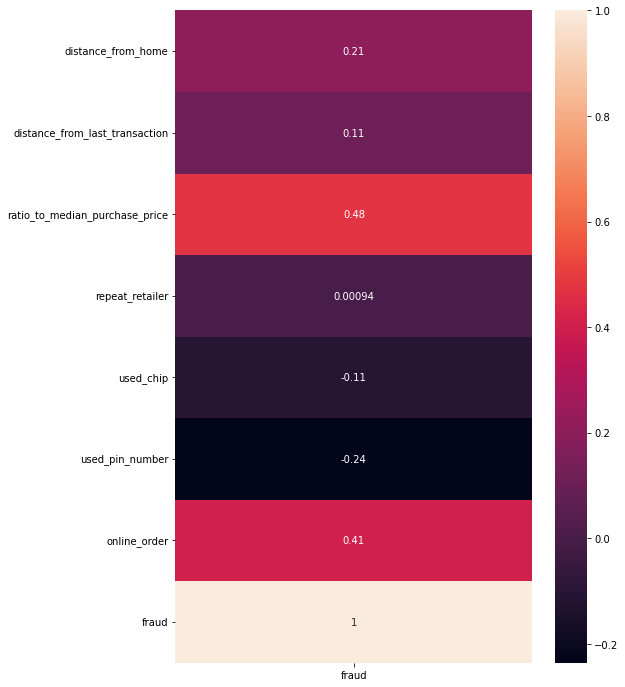

In [15]:
plt.figure(figsize = (8,12))
sns.heatmap(data_fraud.corr()[['fraud']], 
            annot = True
           );

# Criação de uma lista vazia para armazenar as métricas dos modelos

In [16]:
data_all=[]

# Definição das matriz features, variável varget - Sepração modelo treino e teste

Definindo a matriz de features e a variável target

In [17]:
X = data_fraud.drop(columns=['fraud'],axis=1)
y = data_fraud["fraud"]

Split do dataset de treino e de teste

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=12)

Verificando se as proporções da variável target no treino e teste são correspondentes

In [19]:
y_train.mean(), y_test.mean()

(0.5, 0.5)

Check dos dataset de treino e teste

In [20]:
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (7500, 7)
y_train: (7500,)
X_test: (2500, 7)
y_test: (2500,)


# Padronização das features do modelos de treino e de teste

In [21]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Modelo 1: Regressão Logística

Instanciando um objeto da classe LogisticRegression

In [22]:
lr = LogisticRegression()

Ajuste do modelo

In [23]:
lr.fit(X_train_std, y_train)

LogisticRegression()

Visualização dos coeficientes

In [24]:
print(lr.coef_)
print(lr.intercept_)

[[ 2.80588016  1.67482526  5.63896031 -0.35637984 -0.59920962 -1.76942084
   2.16565938]]
[0.34480322]


Previsão da acurácia com o modelo treinado

In [25]:
score_train = accuracy_score(y_train, lr.predict(X_train_std))
print('Score train: ', score_train)

Score train:  0.9388


Matriz de confusão do modelo de treino

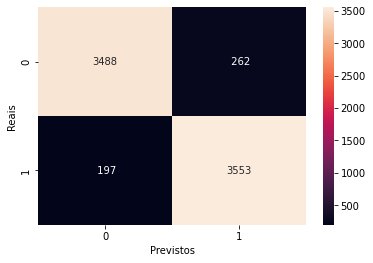

In [26]:
sns.heatmap(confusion_matrix(y_train, lr.predict(X_train_std)), 
            annot = True, 
            fmt = '4d'
           )

plt.xlabel('Previstos')
plt.ylabel('Reais');

Observamos que há uma acurácia de 94%, dos 3750 casos positivos de fraud 3588 foram fraudes verdadeiras. Isso implica que nosso classificador está dizendo 95% das detecções de fraudes são positivas.

Previsão da acurácia com o modelo de teste

In [27]:
y_test_pred = lr.predict(X_test_std)

Acurácia do modelo de teste

In [28]:
score_test = accuracy_score(y_test, y_test_pred)
print('Score test: ', score_test)

Score test:  0.9412


Matriz de confusão do modelo de teste

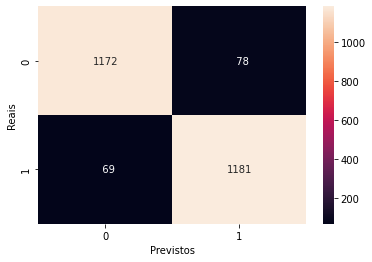

In [29]:
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test_std)), 
            annot = True, 
            fmt = '4d'
           )

plt.xlabel('Previstos')
plt.ylabel('Reais');

Observamos que há uma acurácia de 94%, dos 1250 casos positivos de fraud 1188 foram fraudes verdadeiras. Isso implica que nosso classificador está dizendo 95% das detecções de fraudes são positivas.

Métricas do modelo de teste

In [30]:
target_names=['No Fraud 0', 'Fraud 1']
report_class = classification_report(y_test, y_test_pred, target_names=target_names)
print("Classification Report:\n----------------------\n", report_class)

Classification Report:
----------------------
               precision    recall  f1-score   support

  No Fraud 0       0.94      0.94      0.94      1250
     Fraud 1       0.94      0.94      0.94      1250

    accuracy                           0.94      2500
   macro avg       0.94      0.94      0.94      2500
weighted avg       0.94      0.94      0.94      2500



Inserindo as métricas na lista para armazenamento

In [31]:
m='Logistic Regression'
test_recall_lr = recall_score(y_test, y_test_pred, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred, pos_label=1)
test_auc_lr = auc(fpr,tpr)
f1_score_lr = f1_score(y_test, y_test_pred)

In [32]:
data_all.append([m,score_train,score_test,test_recall_lr,test_auc_lr,f1_score_lr])

# Modelo 2: Randon Forest

In [33]:
rf=RandomForestClassifier()

Treino do modelo usando os conjuntos de treinamento y_pred=clf.predict(X_test)

In [34]:
rf.fit(X_train_std, y_train)

RandomForestClassifier()

In [35]:
score_train = accuracy_score(y_train, rf.predict(X_train_std))
print('Score train: ', score_train)

Score train:  1.0


In [36]:
y_test_pred = rf.predict(X_test_std)

In [37]:
score_test = accuracy_score(y_test, y_test_pred)
print('Score test: ', score_test)

Score test:  0.9988


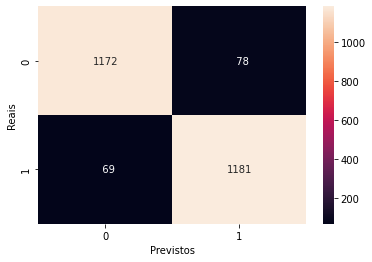

In [38]:
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test_std)), 
            annot = True, 
            fmt = '4d'
           )

plt.xlabel('Previstos')
plt.ylabel('Reais');

In [39]:
target_names=['No Fraud 0', 'Fraud 1']
report_class = classification_report(y_test, y_test_pred, target_names=target_names)
print("Classification Report:\n----------------------\n", report_class)

Classification Report:
----------------------
               precision    recall  f1-score   support

  No Fraud 0       1.00      1.00      1.00      1250
     Fraud 1       1.00      1.00      1.00      1250

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



In [40]:
m='Randon Forest'
test_recall = recall_score(y_test, y_test_pred, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred, pos_label=1)
test_auc = auc(fpr,tpr)
f1_score = f1_score(y_test, y_test_pred)

In [41]:
data_all.append([m,score_train,score_test,test_recall,test_auc,f1_score])

# Classificação KNN

# Primeiramente vamos escolher qual metrica vai me dar uma accuracy melhor (Euclidean,  Manhattan ou Chebyshev), também vamos escolher com quantos vizinhos a quantidade de vizinhos próximos pelo modelo de validação cruzada.

In [42]:
# Usamos cross validation co, 5 folds
kf = KFold(n_splits = 5, shuffle = True, random_state = 12)
scores_para_df = []
for i in range(1, 26):
# Em cada iteração, instanciamos o modelo com um hiperparâmetro diferente
    model_euclidean = KNeighborsClassifier(metric = 'euclidean', n_neighbors = i)
    model_manhattan = KNeighborsClassifier(metric = 'manhattan', n_neighbors = i)
    model_chebyshev = KNeighborsClassifier(metric = 'chebyshev', n_neighbors = i)
# cross_val_scores retorna uma matriz de 5 resultados,
# um para cada partição que automaticamente criou CV
    cv_scores = cross_val_score(model_euclidean, X_train_std, y_train, cv = kf)
    cv_scores2 = cross_val_score(model_manhattan, X_train_std, y_train, cv = kf)
    cv_scores3 = cross_val_score(model_chebyshev, X_train_std, y_train, cv = kf)
# Para cada valor de n_neighbours, criamos um dicionário com o valor
# de n_neighbours e a média das pontuações
    dict_row_score = { 'n_neighbors': i, 'euclidean': np.mean(cv_scores),'manhattan': np.mean(cv_scores2),'chebyshev': np.mean(cv_scores3)}
# Salvamos cada um na lista definida fora do loop
    scores_para_df.append(dict_row_score)

# De acordo com os vizinhos próximos as 3 melhores accuracy das metricas estão grifadas em amarelo, a melhor metrica foi a manhattan

In [43]:
df_scores = pd.DataFrame(scores_para_df)
df_scores.style.highlight_max(subset=['euclidean','manhattan','chebyshev'])

,n_neighbors,euclidean,manhattan,chebyshev
0,1,0.990000,0.990400,0.989067
1,2,0.989867,0.990533,0.987733
2,3,0.989467,0.990000,0.989200
3,4,0.989733,0.990533,0.989333
4,5,0.987733,0.989467,0.988133
5,6,0.987867,0.989467,0.987067
6,7,0.987600,0.988800,0.986000
7,8,0.986267,0.988533,0.985333
8,9,0.986267,0.987733,0.984800
9,10,0.986000,0.987200,0.984400


# Vamos utilizar a metrica distância de Euclidean com 3 vizinhos

In [44]:
knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 4)

In [52]:
X_train_std, X_test_std, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

In [67]:
knn.fit(X_train_std, y_train);

In [68]:
y_pred = knn.predict(X_test_std)

In [69]:
accuracy_score(y_test, y_pred).round(4)

0.9565

In [70]:
confusion_matrix(y_test,y_pred)

array([[ 908,   71],
       [  16, 1005]], dtype=int64)

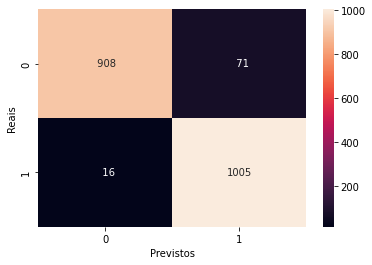

In [71]:
sns.heatmap(confusion_matrix(y_test, knn.predict(X_test_std)), 
            annot = True, 
            fmt = '4d'
           )

plt.xlabel('Previstos')
plt.ylabel('Reais');

In [73]:
target_names=['No Fraud 0', 'Fraud 1']
report_class = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:\n----------------------\n", report_class)

Classification Report:
----------------------
               precision    recall  f1-score   support

  No Fraud 0       0.98      0.93      0.95       979
     Fraud 1       0.93      0.98      0.96      1021

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



#  DEIXAR ESSE PARA FINAL, OS MODELOS DEVEM SER INSERIDOS ANTES DAQUI
Transformando a lista de métricas num dataframe e imprimindo as informações de todos modelos

In [43]:
models=['LogReg','RanFor']
pd_scores=pd.DataFrame(data_all,columns=['model','train score','test score','test recall','test_auc','F1 Score'])
print(pd_scores)

                 model  train score  test score  test recall  test_auc  \
0  Logistic Regression     0.940133      0.9432       0.9544    0.9432   
1        Randon Forest     1.000000      0.9992       1.0000    0.9992   

   F1 Score  
0  0.943829  
1  0.999201  


Modelo 3: MOdelo Gaussian Naive Bayes